In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # import RandomForestRegressor
from sklearn.metrics import r2_score, make_scorer, mean_squared_error # import metrics from sklearn
from time import time

In [144]:
#loading dataset
train = pd.read_csv("D:/data sets/housepredictin/train.csv")
test =  pd.read_csv("D:/data sets/housepredictin/test.csv")

df_train = train.copy()
df_test = test.copy()
print("train: ", train.shape)
print("test: " , test.shape)

train:  (1460, 81)
test:  (1459, 80)


In [145]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [146]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [147]:
target= df_train['SalePrice'] 
df_train = df_train.drop('SalePrice', axis =1)
df_train['training_set'] = True
df_test['training_set'] = False

In [148]:
#concat train and test
df =pd.concat([df_train, df_test])

In [149]:
df.shape

(2919, 81)

In [113]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,training_set
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,True
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,True
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,True
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,True
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,True


In [114]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [150]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond        159
PavedDrive

In [151]:
#we can drop 'ID'
df.drop('Id', axis =1, inplace =True)

In [152]:
df.shape

(2919, 80)

In [153]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,training_set
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,True
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,True
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,True
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,True
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,True


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

In [155]:
#group column by their types
df.columns.to_series().groupby(df.dtypes).groups

{dtype('bool'): Index(['training_set'], dtype='object'),
 dtype('int64'): Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
        'GarageCars', 'GarageArea'],
       dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'E

In [156]:
target.isnull().sum()

0

In [157]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

mu = 180921.19589041095
sigma=  79415.29188606751
Skewness: 1.882876


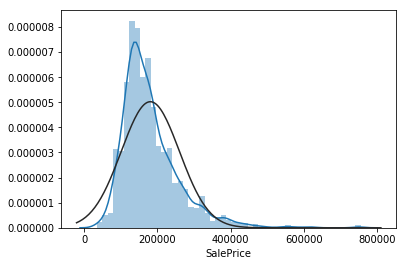

In [158]:
from scipy.stats import norm, skew
sns.distplot(target,fit=norm)
(mu,sigma) = norm.fit(target)
print('mu =' , mu)
print('sigma= ',  sigma)
print("Skewness: %f" %target.skew())


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

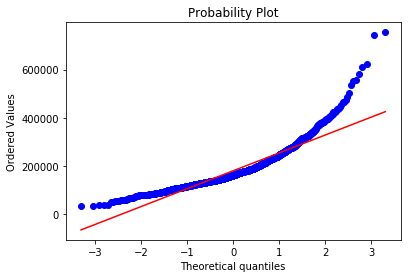

In [159]:
from scipy import stats
stats.probplot(target, plot = plt)


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

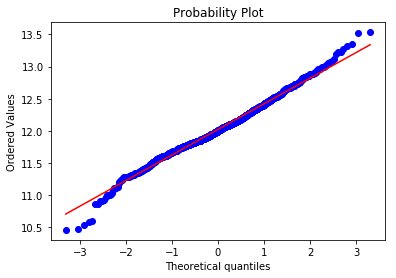

In [160]:

#normalizing value
target = np.log(target)
stats.probplot(target, plot = plt)

mu = 12.024050901109383
sigma=  0.39931504624370256
Skewness: 0.121335


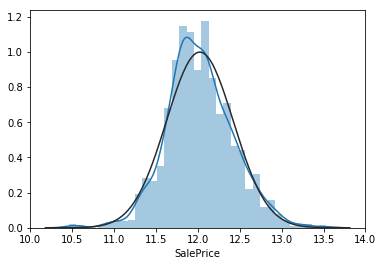

In [161]:
sns.distplot(target, fit = norm)
(mu,sigma) = norm.fit(target)
print('mu =' , mu)
print('sigma= ',  sigma)
print("Skewness: %f" % target.skew())

Text(0.5, 1.0, 'Price')

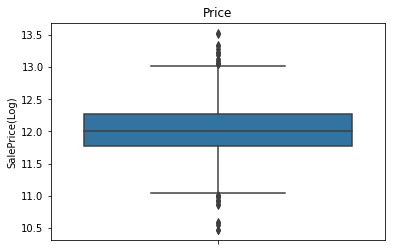

In [162]:
#visulaising outliers
sns.boxplot(y=target)
plt.ylabel('SalePrice(Log)')
plt.title('Price')

handling missing values

In [163]:
Total = df.isnull().sum().sort_values(ascending = True)
prec =(df.isnull().sum()/len(df))*100
ratio =prec.sort_values(ascending = True)
#missing_data = pd.DataFrame({'Missing Ratio' :ratio})
missing_data = pd.concat([Total,prec], axis =1, keys = ['Total','Percent'])
missing_data.head(20)

C:\Users\Namratesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Total,Percent
1stFlrSF,0,0.000000
2ndFlrSF,0,0.000000
3SsnPorch,0,0.000000
Alley,2721,93.216855
BedroomAbvGr,0,0.000000
BldgType,0,0.000000
BsmtCond,82,2.809181
BsmtExposure,82,2.809181
BsmtFinSF1,1,0.034258
BsmtFinSF2,1,0.034258


In [164]:
# we can drop values that has missing value more than 15%
df.drop('PoolQC', axis = 1, inplace=True)
df.drop('MiscFeature', axis = 1, inplace=True)
df.drop('Alley', axis = 1, inplace=True)
df.drop('Fence', axis = 1, inplace=True)
df.drop('FireplaceQu', axis = 1, inplace=True)
df.drop('LotFrontage', axis = 1, inplace=True)

In [165]:
df.shape

(2919, 74)

In [166]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [167]:
#list all the non-numercial columns from df
cat_var = list(df.select_dtypes(exclude = ['int64','float64', 'bool']).columns.values)


In [170]:
categorial_variables = list(df.select_dtypes(exclude=['int64' , 'float64', 'bool']).columns.values) 
# Apply per-column median of that columns and fill with that value 
df[categorial_variables] = df[categorial_variables].apply(lambda x: x.fillna("None"),axis=0) 

In [171]:
#list all numeric columns
numeric_var = list(df.select_dtypes(include=['int64','float64']).columns.values)

#
df[numeric_var]  =df[numeric_var].apply(lambda x : x.fillna(x.median()), axis=0)



In [172]:
df.isnull().sum().sort_values(ascending = False)

training_set     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofMatl         0
YearRemodAdd     0
SaleCondition    0
YearBuilt        0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
                ..
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
GarageFinish     0
GarageYrBlt      0
GarageType       0
BsmtHalfBath     0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
FullBath    

In [173]:
df = pd.get_dummies(df)

In [175]:
df.shape

(2919, 287)

In [176]:
df_train = df[df['training_set']==True]
df_train = df_train.drop('training_set', axis=1)
df_test = df[df['training_set']==False]
df_test = df_test.drop('training_set', axis=1)
print(df_train.shape,df_test.shape)

(1460, 286) (1459, 286)


In [178]:
X_train, X_test, y_train, y_test = train_test_split(df_train, target, random_state=42) 

In [181]:
rf_model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test) 

In [184]:
from sklearn.model_selection import ShuffleSplit
rf_regressor = RandomForestRegressor(random_state=42) 
cv_sets = ShuffleSplit(random_state = 4) # shuffling our data for c ross-validation 
parameters = {'n_estimators':[100, 120, 140],'min_samples_leaf':[1, 2, 3], 'max_depth':[10,15,20]} 


In [188]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
scorer = make_scorer(r2_score)
n_iter_search = 10
grid_obj = RandomizedSearchCV(rf_regressor,parameters, n_iter = n_iter_search,scoring = scorer, cv = cv_sets, random_state= 99) 


In [189]:
grid_fit = grid_obj.fit(X_train, y_train) 


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator'

In [191]:
rf_opt = grid_fit.best_estimator_

In [192]:
grid_fit.best_params_ 

{'n_estimators': 120, 'min_samples_leaf': 1, 'max_depth': 15}

In [193]:
rf_opt_preds = rf_opt.predict(X_test)

In [194]:

importances = rf_opt.feature_importances_
X_train.columns.values[(np.argsort(importances)[::-1])[:5]] # the top 

array(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'GarageArea'], dtype=object)